In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv('data/additional/Depuracion(ventas unitarias).csv')
emissions = pd.read_csv('data/emissions/historical_emissions.csv')

### a. Reducción de carga cognitiva

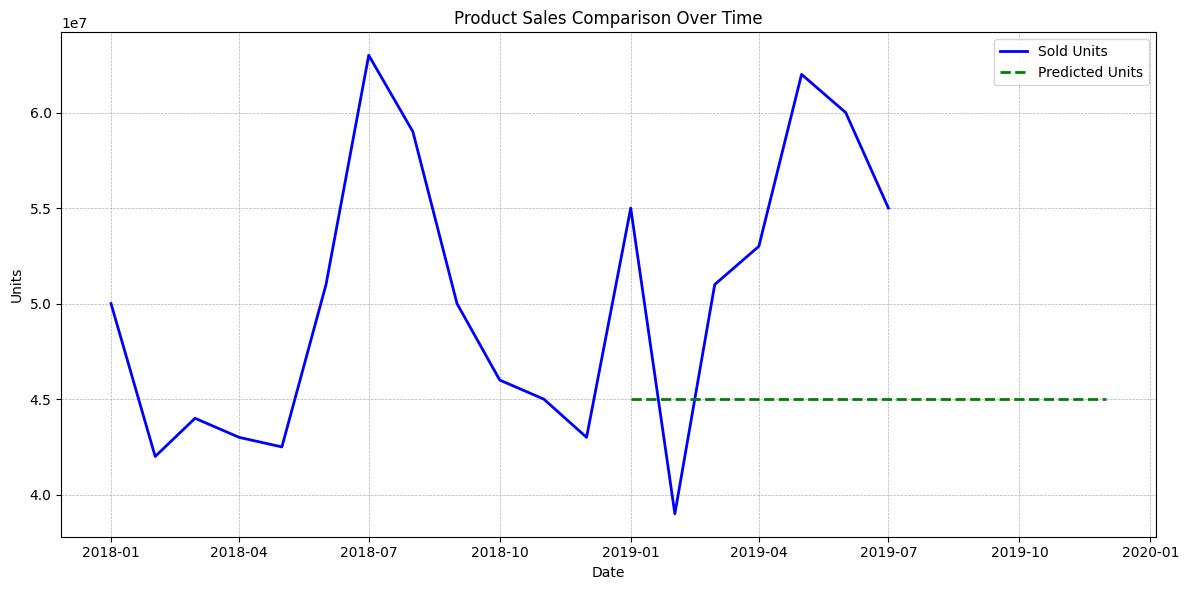

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

sales.columns = ['date', 'sold_units', 'predicted_units']
sales['date'] = pd.to_datetime(sales['date'], format='%b-%y')

plt.figure(figsize=(12, 6))
plt.plot(sales['date'], sales['sold_units'], label='Sold Units', color='blue', linewidth=2)
plt.plot(sales['date'], sales['predicted_units'], label='Predicted Units', color='green', linestyle='--', linewidth=2)

plt.title('Product Sales Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Units')
plt.legend()
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


💡 Usar gráficos de líneas en lugar de barras reduce la carga cognitiva al presentar los datos de manera simplificada. Las líneas permiten comparar fácilmente las tendencias de las unidades vendidas a lo largo del tiempo. Una menor cantidad de líneas de cuadrícula y una presentación ordenada contribuyen a una visualización más limpia y comprensible.

### b. Cree una visualización que demuestre al menos dos principios de la Gestalt.

In [12]:
year_columns = [str(year) for year in range(1990, 2019)]

df_long = emissions.melt(id_vars=['Country', 'Sector', 'Gas', 'Unit'],
                  value_vars=year_columns,
                  var_name='Year',
                  value_name='Emissions')

df_long['Year'] = df_long['Year'].astype(int)

df_long['Emissions'] = pd.to_numeric(df_long['Emissions'], errors='coerce')

df_long = df_long.dropna(subset=['Emissions'])

print(df_long.head())


               Country                Sector  Gas    Unit  Year  Emissions
0                World  Total including LUCF  CO2  MtCO₂e  1990   22849.92
1                China  Total including LUCF  CO2  MtCO₂e  1990    1823.96
2        United States  Total including LUCF  CO2  MtCO₂e  1990    4426.40
3  European Union (27)  Total including LUCF  CO2  MtCO₂e  1990    3286.44
4                India  Total including LUCF  CO2  MtCO₂e  1990     341.32


                  Country                Sector  Gas    Unit  Year  Emissions
3900                World  Total including LUCF  CO2  MtCO₂e  2010   33328.38
3901                China  Total including LUCF  CO2  MtCO₂e  2010    8138.34
3902        United States  Total including LUCF  CO2  MtCO₂e  2010    4990.96
3903  European Union (27)  Total including LUCF  CO2  MtCO₂e  2010    2900.69
3904                India  Total including LUCF  CO2  MtCO₂e  2010    1670.29


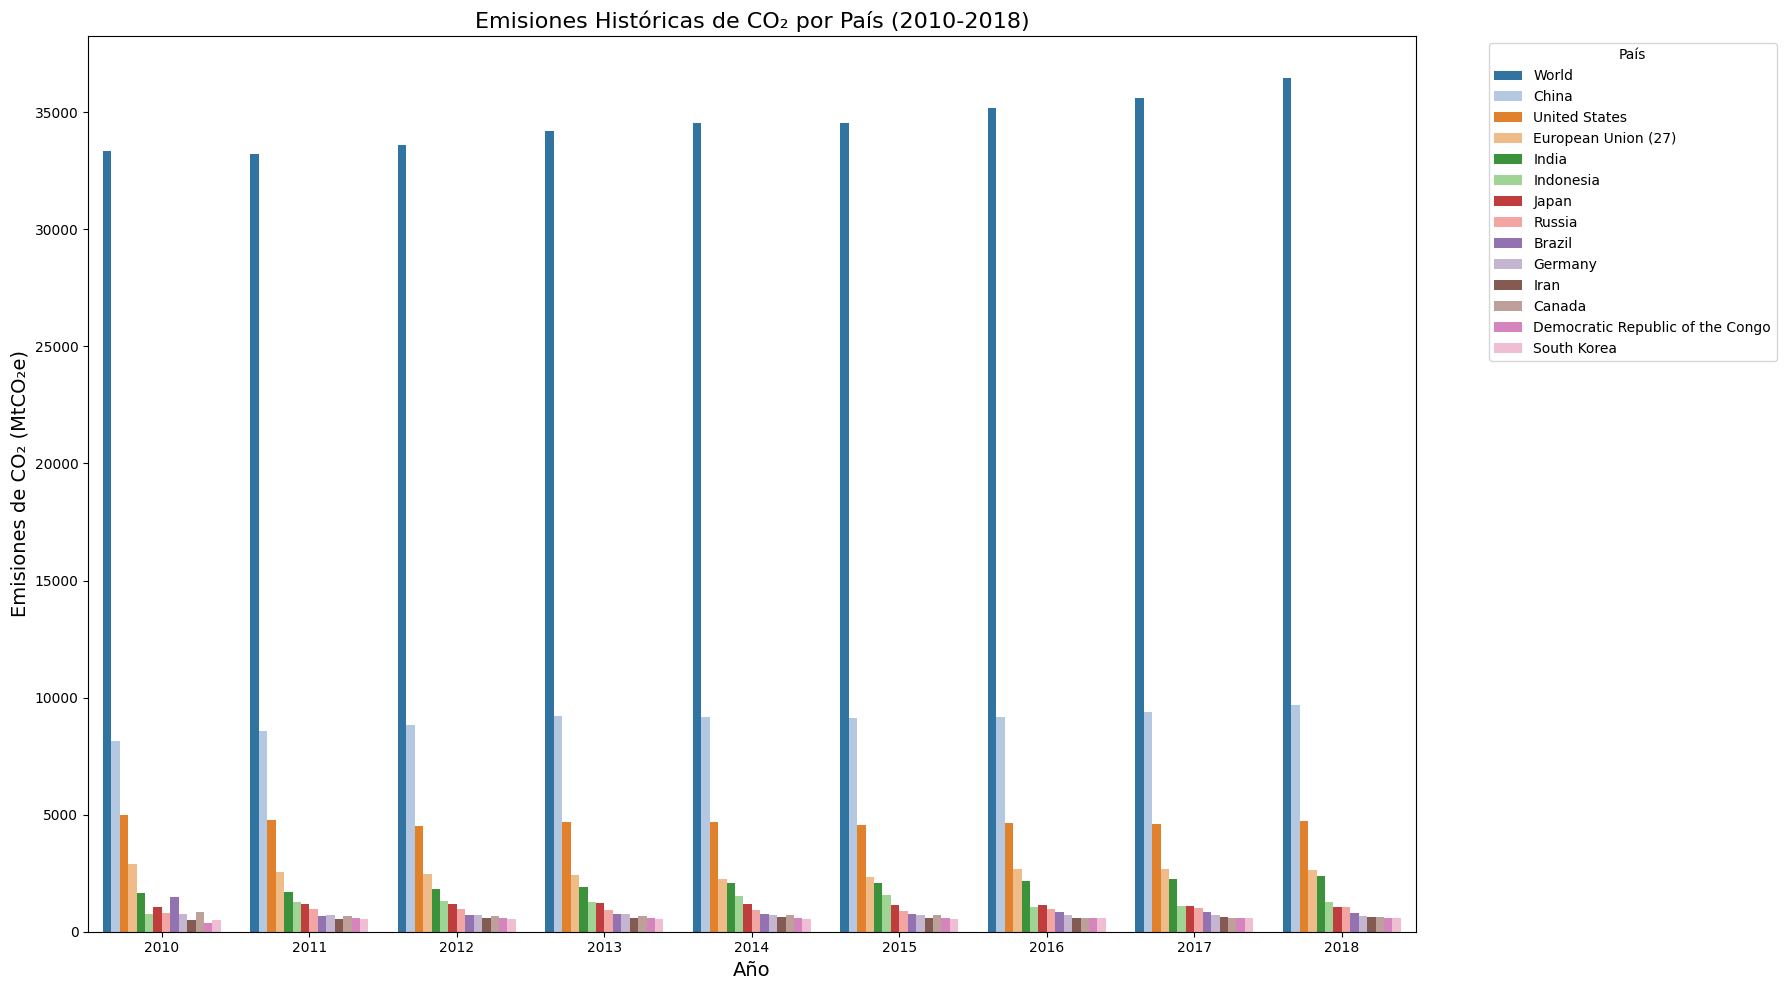

In [11]:
# Top 15 países por emisiones históricas de CO₂
top_countries = ['World', 'China', 'United States', 'European Union (27)', 
                'India', 'Indonesia', 'Japan', 'Russia', 'Brazil', 
                'Germany', 'Iran', 'Canada', 'Democratic Republic of the Congo', 
                'South Korea']

df_filtered = df_long[df_long['Country'].isin(top_countries)]

df_filtered = df_filtered[(df_filtered['Year'] >= 2010) & (df_filtered['Year'] <= 2018)]

print(df_filtered.head())

plt.figure(figsize=(18, 10))

palette = sns.color_palette("tab20", len(top_countries))

sns.barplot(data=df_filtered, 
            x='Year', 
            y='Emissions', 
            hue='Country', 
            palette=palette)

plt.xlabel('Año', fontsize=14)
plt.ylabel('Emisiones de CO₂ (MtCO₂e)', fontsize=14)
plt.title('Emisiones Históricas de CO₂ por País (2010-2018)', fontsize=16)

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

*Similitud*:
Cada país tiene un color específico y consistente a lo largo de todos los años. Esto permite a los espectadores identificar rápidamente las emisiones de un país en particular en diferentes años. <br>

*Proximidad*:
Las barras correspondientes a un mismo año están agrupadas juntas. Esto facilita la comparación de las emisiones entre diferentes países dentro del mismo año, ya que están físicamente cercanas en el gráfico.

### c. (pt.1) Cree una gráfica que intencionalmente sea engañosa 

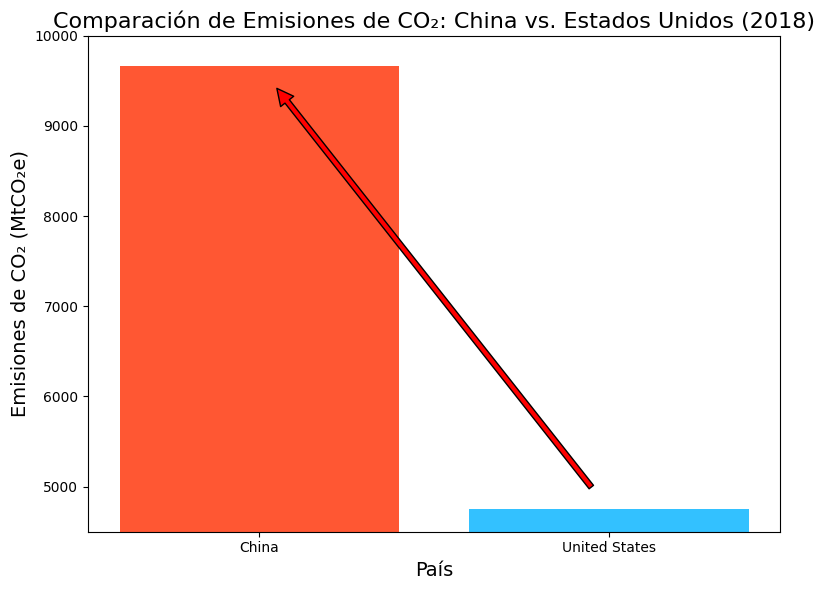

In [32]:
df_filtered = df_long[(df_long['Country'].isin(['China', 'United States'])) & 
                      (df_long['Year'] == 2018)]

plt.figure(figsize=(8, 6))

bars = plt.bar(df_filtered['Country'], df_filtered['Emissions'], color=['#FF5733', '#33C1FF'])

plt.xlabel('País', fontsize=14)
plt.ylabel('Emisiones de CO₂ (MtCO₂e)', fontsize=14)
plt.title('Comparación de Emisiones de CO₂: China vs. Estados Unidos (2018)', fontsize=16)

plt.ylim(4500, 10000)   # Aquí anda el truco

plt.annotate('', xy=(0, df_filtered[df_filtered['Country'] == 'China']['Emissions'].values[0]),
             xytext=(1, df_filtered[df_filtered['Country'] == 'United States']['Emissions'].values[0]),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Mostrar la gráfica
plt.tight_layout()
plt.show()

 Al establecer el límite inferior del eje Y en 4,500 MtCO₂e, omitimos valores significativamente más bajos (por ejemplo, las emisiones de Estados Unidos). Esto hace que la barra de Estados Unidos parezca casi inexistente en comparación con la de China. Se sobrestima visualmente la magnitud de las emisiones de China y se minimiza la de Estados Unidos

### c. (pt.2) Encuentre un ejemplo real de una visualización engañosa en medios de comunicación y explique cómo podría corregirse.

![alt text](blog-misleading-gun-deaths-graph.jpeg.avif "Title")

El eje Y está invertido, situando el valor máximo de 800 en la parte inferior. Esta manipulación induce una percepción errónea, sugiriendo que la cantidad de asesinatos por armas disminuyó tras la aprobación de la ley correspondiente, cuando en realidad ocurre lo contrario. La única forma de corregirlo es invirtiendo nuevamente el eje Y, las líneas con pendiente positiva siempre deberían comunicar un aumento (esa es la percepción general).

### d. Analice las diferencias entre una visualización con configuraciones predeterminadas y una optimizada del mismo conjunto de datos.

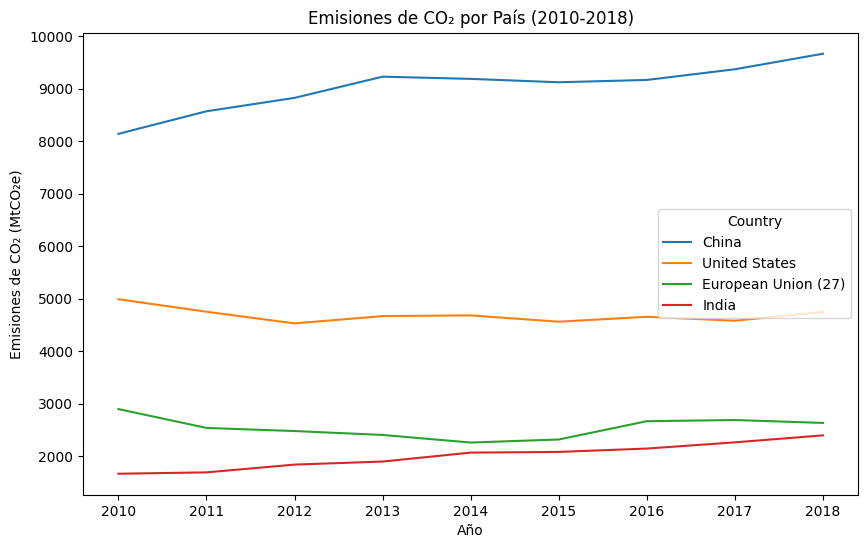

In [33]:
top_countries = ['China', 'United States', 'European Union (27)', 'India']
df_filtered = df_long[df_long['Country'].isin(top_countries)]

# Seleccionar un rango de años, por ejemplo, 2010 a 2018
df_filtered = df_filtered[(df_filtered['Year'] >= 2010) & (df_filtered['Year'] <= 2018)]

# Crear un gráfico de líneas con configuraciones predeterminadas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='Year', y='Emissions', hue='Country')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Emisiones de CO₂ (MtCO₂e)')
plt.title('Emisiones de CO₂ por País (2010-2018)')

# Mostrar la gráfica
plt.show()

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_66421/1360167916.py:40: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/adrian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


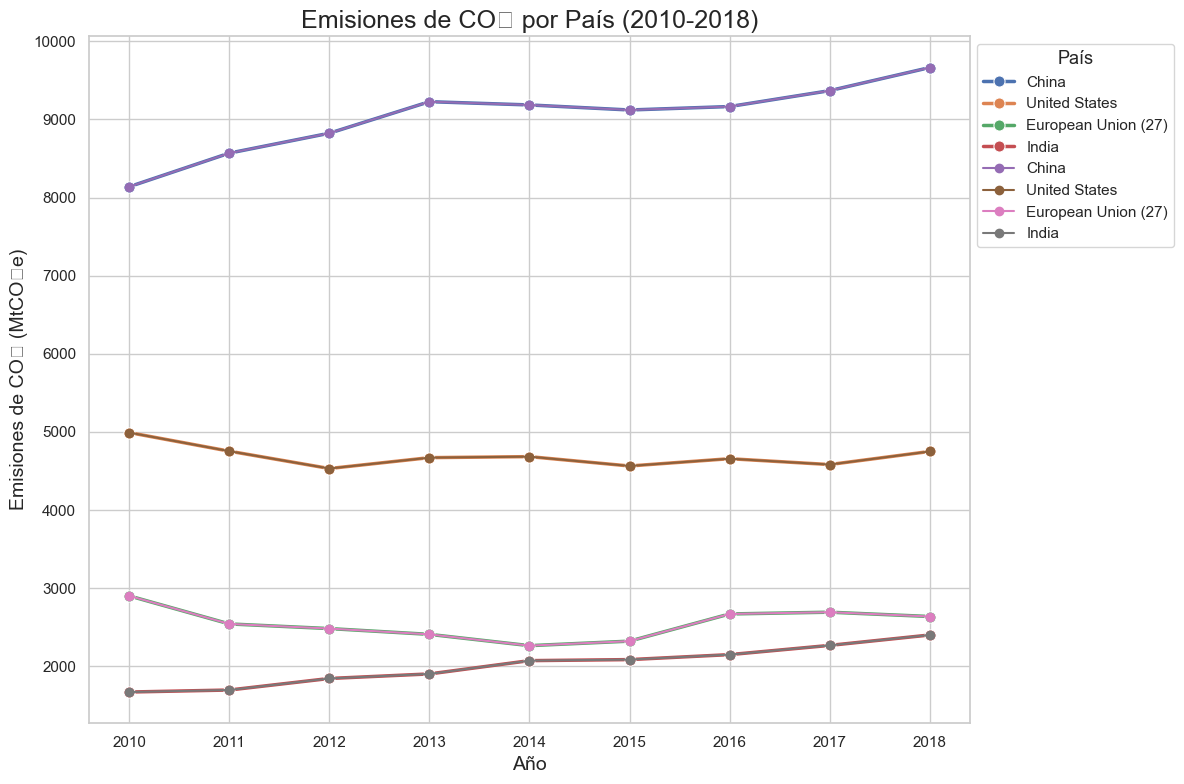

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", color_codes=True)

year_columns = [str(year) for year in range(1990, 2019)]
df_long = emissions.melt(id_vars=['Country', 'Sector', 'Gas', 'Unit'],
                 value_vars=year_columns,
                 var_name='Year',
                 value_name='Emissions')

df_long['Year'] = df_long['Year'].astype(int)
df_long['Emissions'] = pd.to_numeric(df_long['Emissions'], errors='coerce')

df_long = df_long.dropna(subset=['Emissions'])

top_countries = ['China', 'United States', 'European Union (27)', 'India']
df_filtered = df_long[df_long['Country'].isin(top_countries)]

df_filtered = df_filtered[(df_filtered['Year'] >= 2010) & (df_filtered['Year'] <= 2018)]

order = df_filtered[df_filtered['Year'] == 2018].sort_values('Emissions', ascending=False)['Country']

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_filtered, x='Year', y='Emissions', hue='Country', 
             palette="deep", marker='o', linewidth=2.5, markersize=8)

for country in top_countries:
    subset = df_filtered[df_filtered['Country'] == country]
    plt.plot(subset['Year'], subset['Emissions'], marker='o', label=country)

plt.xlabel('Año', fontsize=14)
plt.ylabel('Emisiones de CO₂ (MtCO₂e)', fontsize=14)
plt.title('Emisiones de CO₂ por País (2010-2018)', fontsize=18)

plt.legend(title='País', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()

plt.show()


| **Aspecto**                  | **Configuraciones Predeterminadas**                | **Visualización Optimizada**                                |
|------------------------------|----------------------------------------------------|-------------------------------------------------------------|
| **Estética**                 | Básica y genérica                                  | Atractiva y coherente                                       |
| **Claridad**                 | Menor claridad, posibles solapamientos             | Mayor claridad, elementos bien distribuidos                 |
| **Uso de Colores**           | Paleta estándar, poca diferenciación               | Paleta consistente y diferenciada para cada país            |
| **Leyenda**                  | Posicionada dentro del gráfico, puede solaparse    | Posicionada fuera del gráfico, clara y legible              |
| **Marcadores y Líneas**      | Líneas finas sin marcadores destacados             | Líneas más gruesas con marcadores claros                    |
| **Anotaciones**              | Ausentes                                           | Incluye anotaciones para resaltar tendencias clave          |
| **Principios de la Gestalt** | Limitados                                          | Similitud y Proximidad claramente aplicados                  |



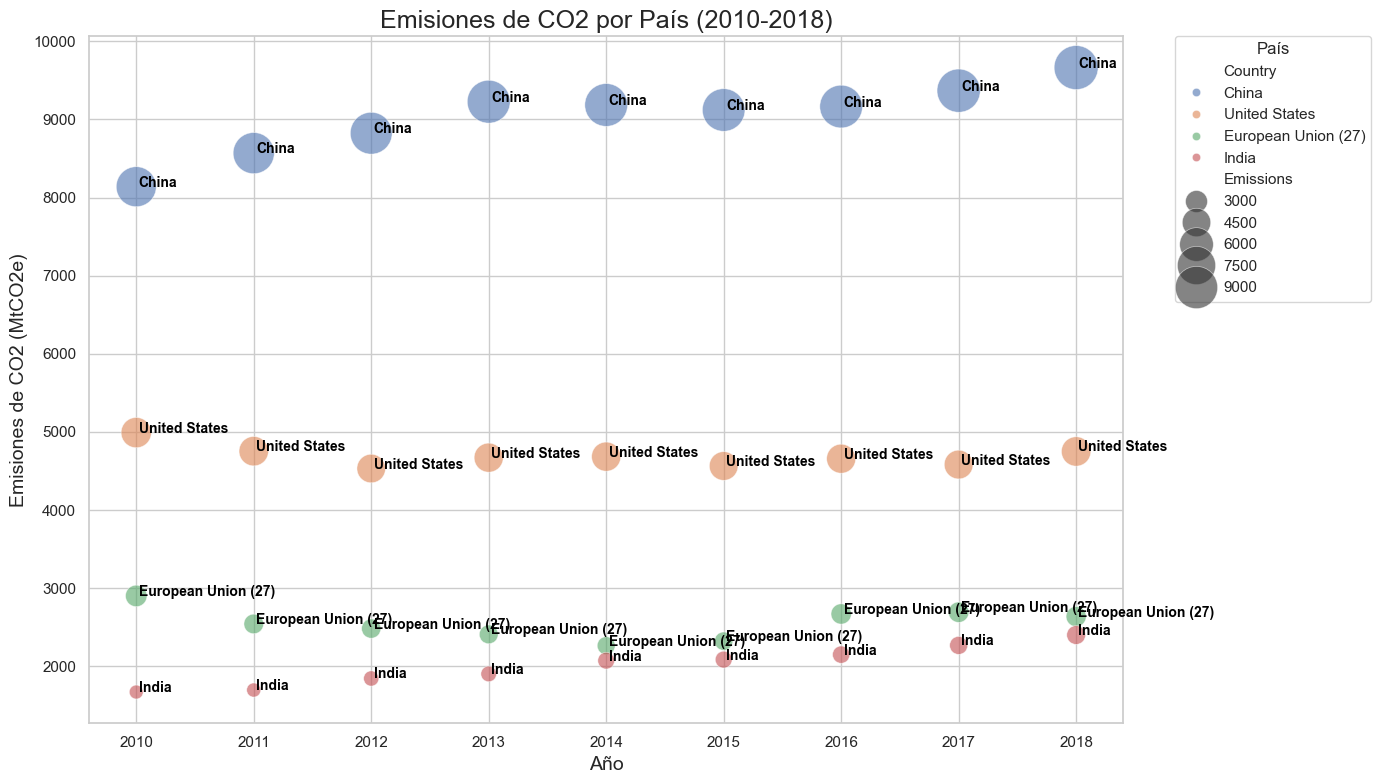

In [39]:
plt.figure(figsize=(14, 8))

bubble = sns.scatterplot(data=df_filtered, 
                         x='Year', 
                         y='Emissions', 
                         hue='Country', 
                         size='Emissions', 
                         sizes=(100, 1000), 
                         alpha=0.6, 
                         palette='deep', 
                         edgecolor='w', 
                         linewidth=0.5)

plt.xlabel('Año', fontsize=14)
plt.ylabel('Emisiones de CO2 (MtCO2e)', fontsize=14)
plt.title('Emisiones de CO2 por País (2010-2018)', fontsize=18)

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

for line in range(0, df_filtered.shape[0]):
     plt.text(df_filtered.Year.iloc[line]+0.02, 
              df_filtered.Emissions.iloc[line], 
              df_filtered.Country.iloc[line],
              horizontalalignment='left', 
              size='small', 
              color='black',
              weight='semibold')

plt.tight_layout()

plt.show()
